In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Load the dataset
df = pd.read_csv('/content/weather.csv')  # adjust path if needed
df.head()


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [2]:
# Step 3: Convert 'Date.Full' to datetime
df['Date.Full'] = pd.to_datetime(df['Date.Full'])


In [6]:
# Step 4: Group by Date and take the mean of 'Avg Temp' for each day
daily_avg = df.groupby('Date.Full')['Data.Temperature.Avg Temp'].mean()

# Convert to a time series with daily frequency
daily_avg = daily_avg.asfreq('D')

# Fill missing values using forward fill or interpolation
daily_avg = daily_avg.interpolate(method='linear')  # smoother than forward fill


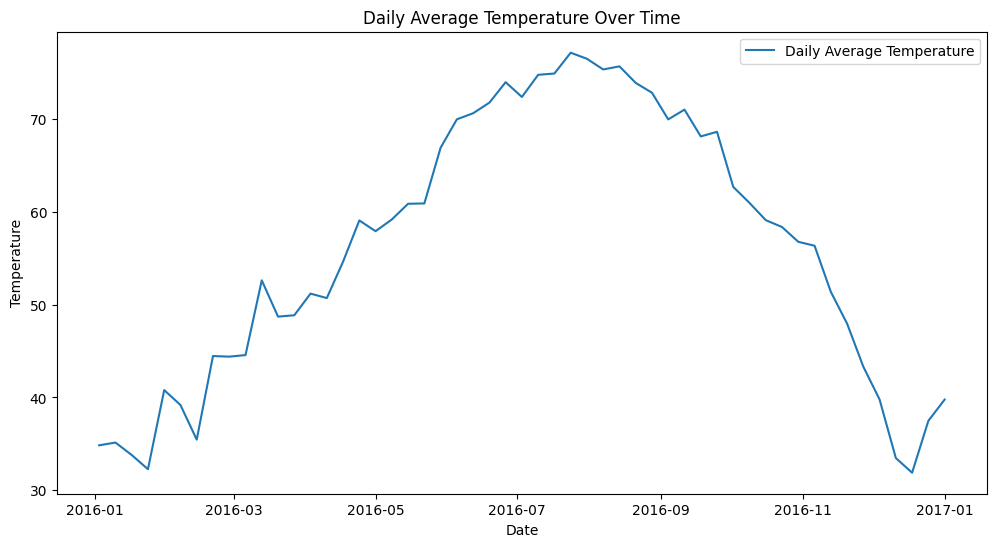

In [7]:
# Step 5: Plot the Time Series to Visualize (check if still NaNs!)
plt.figure(figsize=(12, 6))
plt.plot(daily_avg, label='Daily Average Temperature')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


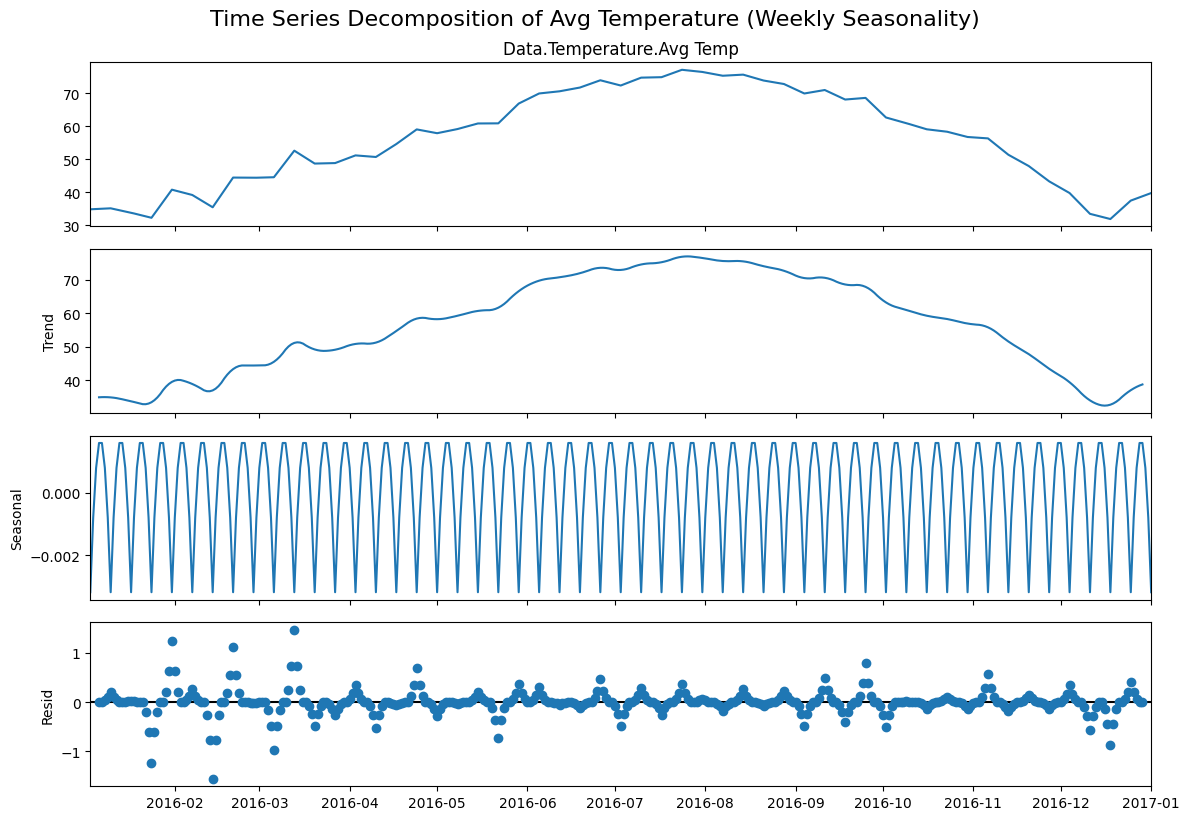

In [12]:
# Decompose the Time Series
result = seasonal_decompose(daily_avg, model='additive', period=7)

# Create figure with adjusted size
fig = result.plot()
fig.set_size_inches(12, 8)  # make it larger so text won't overlap

# Adjust layout to avoid title/text collision
plt.tight_layout()

# Add a clear title
plt.suptitle('Time Series Decomposition of Avg Temperature (Weekly Seasonality)', fontsize=16, y=1.02)

plt.show()
